# Analysis of the Root Network votes

*Update: the interesting part are the 4 last pie charts giving us the trend of the emissions that each subnet receive across the last 4 months*

The goal of this notebook is to have a better understanding of who is part of the root network (does it change often?) and which subnets they vote for (Do they change their vote often? Who votes for new subnets, who doesn't ?). 

In [3]:
import bittensor as bt
import torch
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [4]:
root_metagraph = bt.metagraph(netuid=0, lite=False)

2024-04-23 15:42:51.545 |       INFO       | You are connecting to finney network with endpoint wss://entrypoint-finney.opentensor.ai:443.
2024-04-23 15:42:51.546 |     WARNING      | We strongly encourage running a local subtensor node whenever possible. This increases decentralization and resilience of the network.
2024-04-23 15:42:51.546 |     WARNING      | In a future release, local subtensor will become the default endpoint. To get ahead of this change, please run a local subtensor node and point to it.
2024-04-23 15:42:52.184 |       INFO       | Connected to finney network and wss://entrypoint-finney.opentensor.ai:443.


In [5]:
W = root_metagraph.W.float()
weights = pd.DataFrame(W.numpy())
new_column_names = [f'SN{i}' for i in range(len(weights.columns))]
weights.columns = new_column_names
print(weights)

    SN0       SN1       SN2       SN3       SN4       SN5       SN6       SN7  \
0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.5  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.0  0.092566  0.000000  0.021179  0.043791  0.021361  0.117488  0.009932   
3   0.0  0.000000  0.042599  0.015098  0.245102  0.025099  0.000000  0.035100   
4   0.0  0.017032  0.017032  0.000000  0.048662  0.048662  0.017032  0.017032   
..  ...       ...       ...       ...       ...       ...       ...       ...   
59  0.0  0.047618  0.000000  0.000000  0.047618  0.000000  0.000000  0.000000   
60  0.0  0.199998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
61  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
62  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
63  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         SN8       SN9  ...

In [6]:
hotkeys = root_metagraph.hotkeys
hotkeys = pd.DataFrame(hotkeys, columns=['hotkeys'])

In [7]:
stakes = pd.DataFrame((root_metagraph.stake.float()).numpy(), columns=['stakes'])

In [8]:
stakes_by_hotkey = pd.concat([hotkeys, stakes], axis=1)
root_network = stakes_by_hotkey.join(weights)

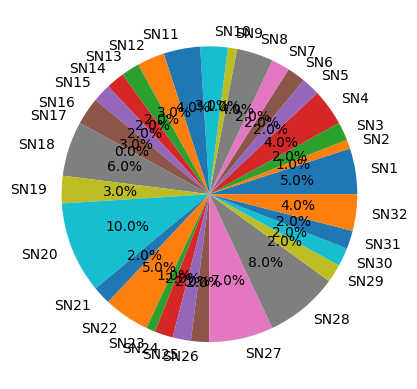

In [9]:
validator5F4t = root_network.iloc[5, 3:35]
plt.pie(validator5F4t, labels=validator5F4t.index, autopct='%1.1f%%')
plt.show()

### How easy is it for a subnet to make its hole and stay registered ?
- How much emissions do each subnet has, and has had over time
- Does the ranking change or stays flat ? 
- How often do new subnet make their hole and stay in the registerd ? 

-> make a list of subnet and the emissions they receive across time
- find a way to differentiate between different subnets with the same number

I start by following the code here: https://docs.bittensor.com/emissions#read-root-network-metagraph

In [10]:
subtensor = bt.subtensor('archive')

2024-04-23 15:43:12.651 |       INFO       | Connected to archive network and wss://archive.chain.opentensor.ai:443/.


In [11]:
emission = subtensor.get_emission_value_by_subnet(1, block=2735000)
print(float(emission))

0.057291609


In [12]:
# essai sur 4 mois, 1semaine = 50400 blocks
blocks = range(2000600, 2807000, 50400)
#jour block 2735000: 10 avril
start_date = datetime(2023, 12, 24)
days_since_start = 0

In [13]:
emissions_data_SN1to8 = {}
emissions_data_SN9to16 = {}
emissions_data_SN17to24 = {}
emissions_data_SN25to32 = {}

for block in blocks:
    subnet_emissions_1 = {}
    subnet_emissions_2 = {}
    subnet_emissions_3 = {}
    subnet_emissions_4 = {}
    date = (start_date + relativedelta(days=days_since_start)).strftime('%Y-%m-%d')
    days_since_start += 7
    print(date)

    for i in range(1, 9):
        emissions_1 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_1[i]= float(emissions_1)
    emissions_data_SN1to8[date] = subnet_emissions_1

    for i in range(9, 17):
        emissions_2 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_2[i]= float(emissions_2)
    emissions_data_SN9to16[date] = subnet_emissions_2

    for i in range(17, 25):
        emissions_3 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_3[i]= float(emissions_3)
    emissions_data_SN17to24[date] = subnet_emissions_3

    for i in range(25, 33):
        emissions_4 = subtensor.get_emission_value_by_subnet(i, block)
        subnet_emissions_4[i]= float(emissions_4)
    emissions_data_SN25to32[date] = subnet_emissions_4

emissions_SN1to8 = pd.DataFrame(emissions_data_SN1to8).T
emissions_SN9to16 = pd.DataFrame(emissions_data_SN9to16).T
emissions_SN17to24 = pd.DataFrame(emissions_data_SN17to24).T
emissions_data_SN25to32 = pd.DataFrame(emissions_data_SN25to32).T


2023-12-24
2023-12-31
2024-01-07
2024-01-14
2024-01-21
2024-01-28
2024-02-04
2024-02-11
2024-02-18
2024-02-25
2024-03-03
2024-03-10
2024-03-17
2024-03-24
2024-03-31
2024-04-07


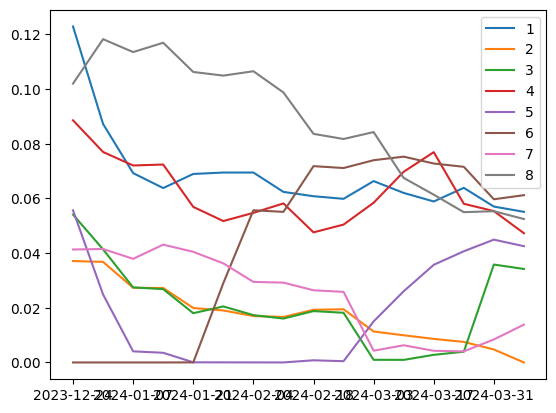

In [14]:
emissions_SN1to8.plot(kind='line')
plt.show()

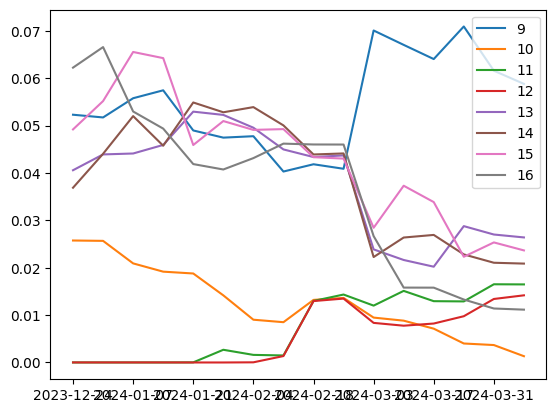

In [16]:
emissions_SN9to16.plot(kind='line')
plt.show()

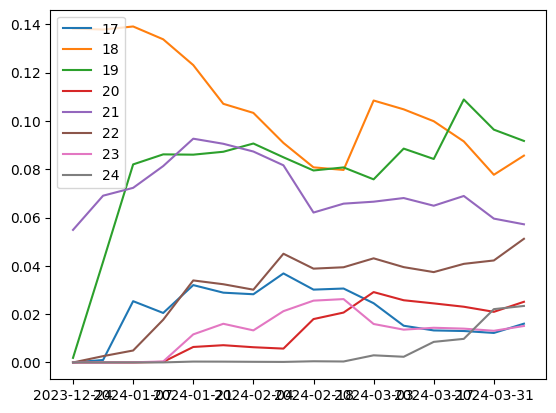

In [17]:
emissions_SN17to24.plot(kind='line')
plt.show()

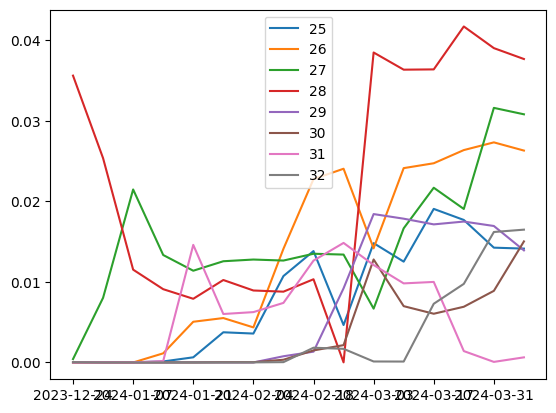

In [19]:
# je me suis trompé de nom de variable pour celui là
emissions_data_SN25to32.plot(kind='line')
plt.show()